In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv('data.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [33]:
print("The Dependent Variables are:")
X = df.iloc[:, [-1]]
X.columns


The Dependent Variables are:


Index(['Loan_Status'], dtype='object')

In [34]:
df2 = df.drop(X.columns, axis=1)
df2.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [35]:
print(f"The No of Dependent Variable: {X.shape[1]}")
print(f"The No of InDependent Variable: {df2.shape[1]}")

The No of Dependent Variable: 1
The No of InDependent Variable: 12


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [27]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


<Axes: title={'center': 'LoanAmount'}, xlabel='ApplicantIncome'>

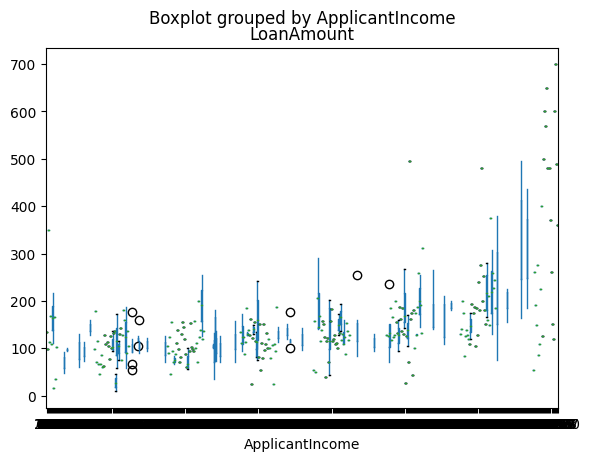

In [28]:
df.boxplot(by="ApplicantIncome", column=["LoanAmount"], grid=False)

In [29]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

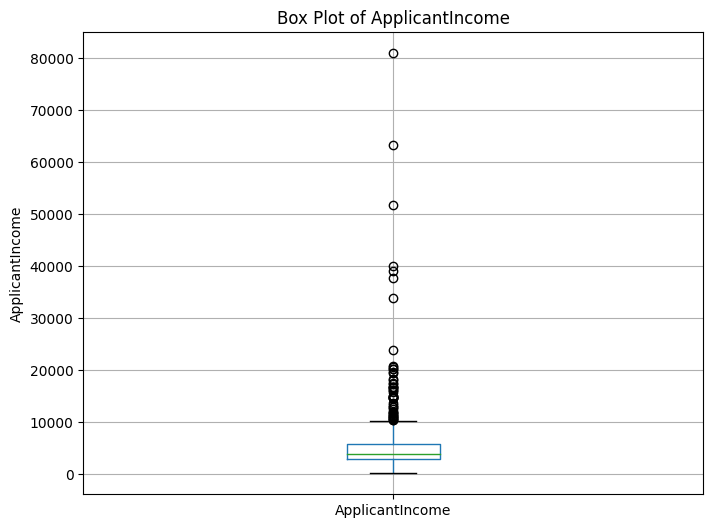

Five-Number Summary of ApplicantIncome:
count      614.000000
mean      5403.459283
std       6109.041673
min        150.000000
25%       2877.500000
50%       3812.500000
75%       5795.000000
max      81000.000000
Name: ApplicantIncome, dtype: float64

Outliers:
      Loan_ID  Gender Married Dependents     Education Self_Employed  \
9    LP001020    Male     Yes          1      Graduate            No   
34   LP001100    Male      No         3+      Graduate            No   
54   LP001186  Female     Yes          1      Graduate           Yes   
67   LP001233    Male     Yes          1      Graduate            No   
102  LP001350    Male     Yes        NaN      Graduate            No   
106  LP001369    Male     Yes          2      Graduate            No   
115  LP001401    Male     Yes          1      Graduate            No   
119  LP001422  Female      No          0      Graduate            No   
126  LP001448     NaN     Yes         3+      Graduate            No   
128  LP001451  

In [30]:
plt.figure(figsize=(8, 6))
df.boxplot(column='ApplicantIncome')
plt.title('Box Plot of ApplicantIncome')
plt.ylabel('ApplicantIncome')
plt.show()

# Calculate the five-number summary (minimum, 25th percentile, median, 75th percentile, maximum)
summary = df['ApplicantIncome'].describe()

# Identify outliers based on IQR method
Q1 = summary['25%']
Q3 = summary['75%']
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['ApplicantIncome'] < lower_bound) | (df['ApplicantIncome'] > upper_bound)]

print("Five-Number Summary of ApplicantIncome:")
print(summary)
print("\nOutliers:")
print(outliers)

In [38]:
numeric_columns = df.select_dtypes(include=['number'])
correlation_matrix = numeric_columns.corr()

# Print the correlation matrix
print(correlation_matrix)

                   ApplicantIncome  CoapplicantIncome  LoanAmount  \
ApplicantIncome           1.000000          -0.116605    0.570909   
CoapplicantIncome        -0.116605           1.000000    0.188619   
LoanAmount                0.570909           0.188619    1.000000   
Loan_Amount_Term         -0.045306          -0.059878    0.039447   
Credit_History           -0.014715          -0.002056   -0.008433   

                   Loan_Amount_Term  Credit_History  
ApplicantIncome           -0.045306       -0.014715  
CoapplicantIncome         -0.059878       -0.002056  
LoanAmount                 0.039447       -0.008433  
Loan_Amount_Term           1.000000        0.001470  
Credit_History             0.001470        1.000000  


In [39]:
correlation_value = correlation_matrix.loc['ApplicantIncome', 'LoanAmount']
print(f"Correlation between 'ApplicantIncome' and 'LoanAmount': {correlation_value}")

Correlation between 'ApplicantIncome' and 'LoanAmount': 0.5709090389885663


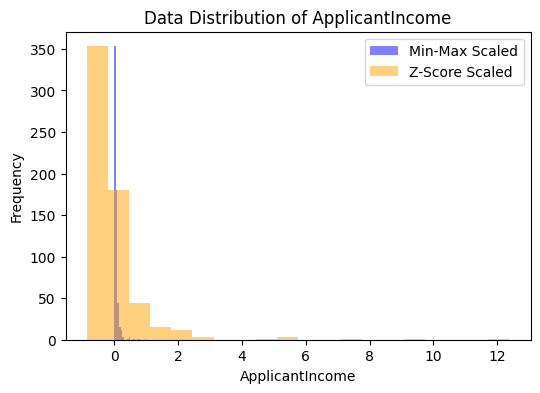

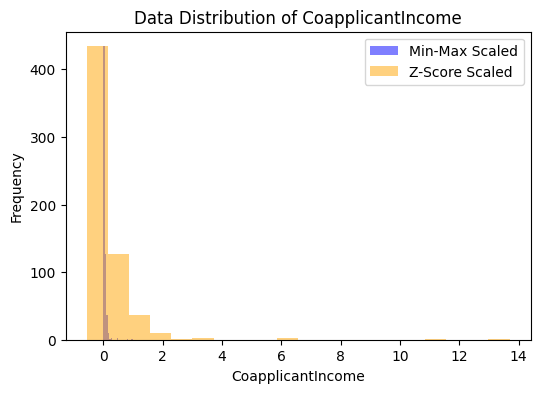

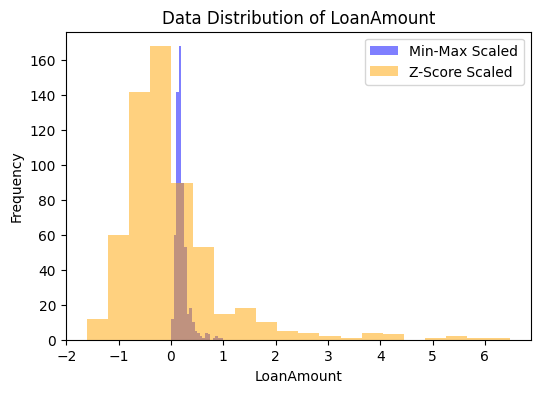

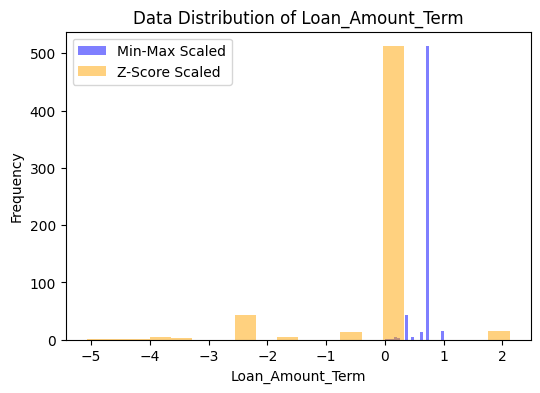

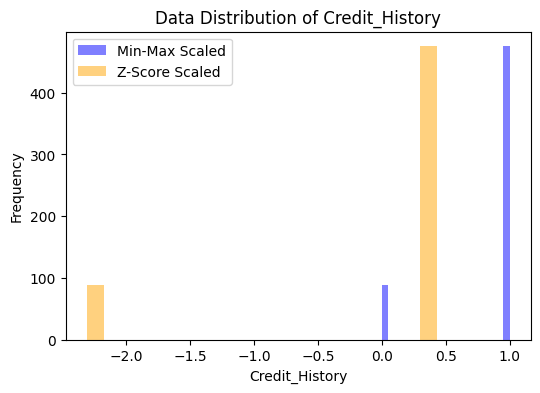

In [41]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
numeric_columns = df.select_dtypes(include=['number'])

# Apply Min-Max scaling
minmax_scaler = MinMaxScaler()
minmax_scaled = minmax_scaler.fit_transform(numeric_columns)
df_minmax = pd.DataFrame(minmax_scaled, columns=numeric_columns.columns)

# Apply Z-score scaling
zscore_scaler = StandardScaler()
zscore_scaled = zscore_scaler.fit_transform(numeric_columns)
df_zscore = pd.DataFrame(zscore_scaled, columns=numeric_columns.columns)

# Plot data distribution for each attribute
for column in df_minmax.columns:
    plt.figure(figsize=(6, 4))
    plt.hist(df_minmax[column], bins=20, alpha=0.5, color='blue', label='Min-Max Scaled')
    plt.hist(df_zscore[column], bins=20, alpha=0.5, color='orange', label='Z-Score Scaled')
    plt.title(f'Data Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()




In [42]:
from sklearn.impute import SimpleImputer
null_counts = df.isnull().sum()
print("Count of Null Values for Each Attribute:")
print(null_counts)

# Impute missing values for numerical columns with mean and binary column with mode
numeric_columns = df.select_dtypes(include=['number'])
categorical_columns = df.select_dtypes(include=['object'])

# Impute missing values for numerical columns with mean
numeric_imputer = SimpleImputer(strategy='mean')
df[numeric_columns.columns] = numeric_imputer.fit_transform(numeric_columns)

# Impute missing values for binary (object) column with mode (most frequent)
categorical_imputer = SimpleImputer(strategy='most_frequent')
df[categorical_columns.columns] = categorical_imputer.fit_transform(categorical_columns)

# Display the DataFrame after imputation
print("\nDataFrame After Imputation:")
print(df)

Count of Null Values for Each Attribute:
Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

DataFrame After Imputation:
      Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes

In [47]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

df = df.drop(['Loan_ID'], axis=1)

# Separate dependent and independent variables
dependent_df = df[['Loan_Status']]
independent_df = df.drop(['Loan_Status'], axis=1)

# Apply one-hot encoding to categorical variables
categorical_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']
transformer = ColumnTransformer(
    transformers=[('cat', OneHotEncoder(), categorical_columns)],
    remainder='passthrough'
)
encoded_data = transformer.fit_transform(independent_df)
independent_encoded_df = pd.DataFrame(encoded_data, columns=list(transformer.get_feature_names_out()))

# Apply Z-score scaling to independent variables
zscore_scaler = StandardScaler()
independent_scaled = zscore_scaler.fit_transform(independent_encoded_df)
independent_scaled_df = pd.DataFrame(independent_scaled, columns=independent_encoded_df.columns)

# Perform train-test split (70:30 ratio)
X_train, X_test, y_train, y_test = train_test_split(
    independent_scaled_df, dependent_df, test_size=0.3, random_state=42
)

# Display the shapes of train and test data
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (429, 24)
X_test shape: (185, 24)
y_train shape: (429, 1)
y_test shape: (185, 1)
